In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('Z_sani.csv')
# 1: oh 2: or 3:mm 4: std 5:target
encode_list = [3,3,3,1,3,1,1,1,1,1,1,1,1,1,1,1,1,3,3,
          1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,
          4,4,4,4,4,4,4,3,3,3,4,4,3,4,4,1,2,5]
df.head()

,Age,Weight,Length,Sex,BMI,DM,HTN,Current Smoker,EX-Smoker,FH,...,K,Na,WBC,Lymph,Neut,PLT,EF-TTE,Region RWMA,VHD,Cath
0,53,90,175,Male,29.387755,0,1,1,0,0,...,4.7,141,5700,39,52,261,50,0,N,Cad
1,67,70,157,Fmale,28.398718,0,1,0,0,0,...,4.7,156,7700,38,55,165,40,4,N,Cad
2,54,54,164,Male,20.077335,0,0,1,0,0,...,4.7,139,7400,38,60,230,40,2,mild,Cad
3,66,67,158,Fmale,26.838648,0,1,0,0,0,...,4.4,142,13000,18,72,742,55,0,Severe,Normal
4,50,87,153,Fmale,37.165193,0,1,0,0,0,...,4.0,140,9200,55,39,274,50,0,Severe,Normal


In [2]:
from sklearn.model_selection import train_test_split
X = df.drop('Cath', axis=1)
y = df['Cath']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.00004)
#####

####

In [30]:
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder,MinMaxScaler,StandardScaler,LabelEncoder
train_col_to_drop = pd.DataFrame({df.columns[0]:X_train[df.columns[0]]})
test_col_to_drop = pd.DataFrame({df.columns[0]:X_test[df.columns[0]]})
col_names = []
for i in range(55):
    if encode_list[i] == 1:
        train = pd.DataFrame({df.columns[i]:X_train[df.columns[i]]})
        test = pd.DataFrame({df.columns[i]:X_test[df.columns[i]]})
        cd = OneHotEncoder(sparse=False,handle_unknown = "ignore")
        X_t_train = cd.fit_transform(train)
        X_t_test = cd.transform(test)
        
        col_name = train.columns[0]
        num_col = X_t_train.shape[1]
        for j in range(num_col):
            col_names.append(col_name + str(j))
        
    if encode_list[i] == 2:
        train = pd.DataFrame({df.columns[i]:X_train[df.columns[i]]})
        test = pd.DataFrame({df.columns[i]:X_test[df.columns[i]]})
        cd = OrdinalEncoder(categories = [['N','mild','Moderate','Severe']])
        X_t_train = cd.fit_transform(train)
        X_t_test = cd.transform(test)
        
        col_name = train.columns[0]
        col_names.append(col_name)
        
    if encode_list[i] == 3:
        train = pd.DataFrame({df.columns[i]:X_train[df.columns[i]]})
        test = pd.DataFrame({df.columns[i]:X_test[df.columns[i]]})
        cd = MinMaxScaler()
        X_t_train = cd.fit_transform(train)
        X_t_test = cd.transform(test)
        
        col_name = train.columns[0]
        col_names.append(col_name)
        
    if encode_list[i] == 4:
        train = pd.DataFrame({df.columns[i]:X_train[df.columns[i]]})
        test = pd.DataFrame({df.columns[i]:X_test[df.columns[i]]})
        cd = StandardScaler()
        X_t_train = cd.fit_transform(train)
        X_t_test = cd.transform(test)
        
        col_name = train.columns[0]
        col_names.append(col_name)
        
    train_col_to_drop = np.concatenate((train_col_to_drop,X_t_train),axis=1)
    test_col_to_drop = np.concatenate((test_col_to_drop,X_t_test),axis=1)
    

le = LabelEncoder()
y_train_le = le.fit_transform(y_train)
y_test_le = le.transform(y_test)
train_data = pd.DataFrame(train_col_to_drop).drop(0,axis=1)
test_data = pd.DataFrame(test_col_to_drop).drop(0,axis=1)
train_data.columns = col_names
test_data.columns = col_names
train_data['y'] = y_train_le
test_data['y'] = y_test_le

In [7]:
# train_data.to_csv("train.csv")
# test_data.to_csv("preprocess_testdata.csv")

In [8]:
ftr_mis = []
for i in df.columns:
    ftr_mis.append(np.mean(df[i].isnull()))
print(ftr_mis)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


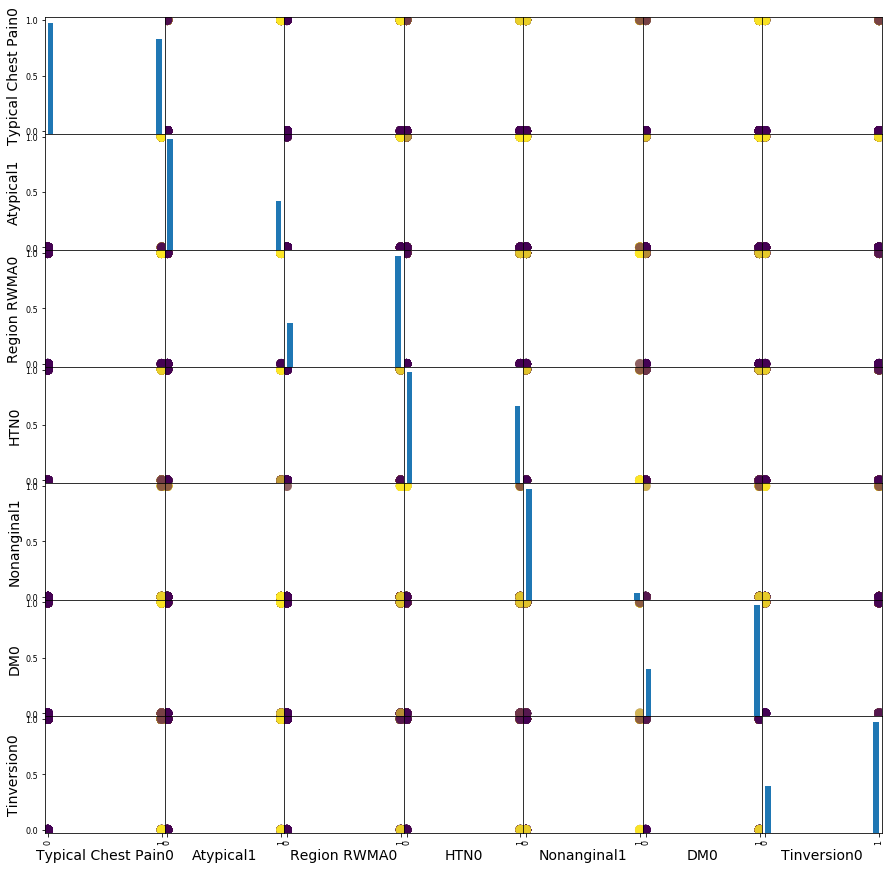

In [90]:
from matplotlib import pylab as plt

df_preprocessed = train_data

corrmat = df_preprocessed.corr()

all_cols = corrmat.sort_values('y',ascending=False)['y'].index 
cols = all_cols[1:8] # positively correlated features
#cols = ['SalePrice']+[col for col in all_cols if '_nan' not in col][:-10:-1] # negatively correlated features

pd.plotting.scatter_matrix(df_preprocessed[cols],c = df_preprocessed['y'], figsize=(15, 15), marker='o',
                           hist_kwds={'bins': 20}, s=100, alpha=.6)
plt.show()

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/misc.py:71: UserWarning:

Attempting to set identical left == right == 1.0 results in singular transformations; automatically expanding.

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/misc.py:81: UserWarning:

Attempting to set identical bottom == top == 1.0 results in singular transformations; automatically expanding.

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/misc.py:80: UserWarning:

Attempting to set identical left == right == 1.0 results in singular transformations; automatically expanding.

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/misc.py:95: RuntimeWarning:

invalid value encountered in true_divide



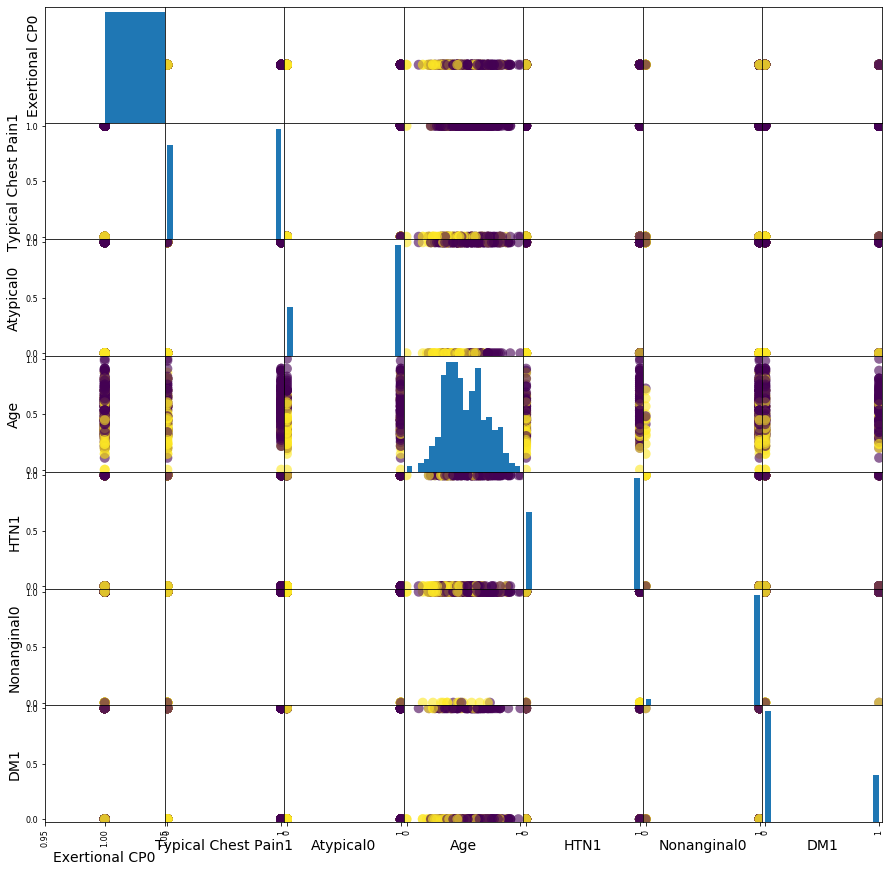

In [91]:
all_cols = corrmat.sort_values('y',ascending=False)['y'].index 
cols = all_cols[:-8:-1] # positively correlated features
#cols = ['SalePrice']+[col for col in all_cols if '_nan' not in col][:-10:-1] # negatively correlated features

pd.plotting.scatter_matrix(df_preprocessed[cols],c = df_preprocessed['y'], figsize=(15, 15), marker='o',
                           hist_kwds={'bins': 20}, s=100, alpha=.6)
plt.show()

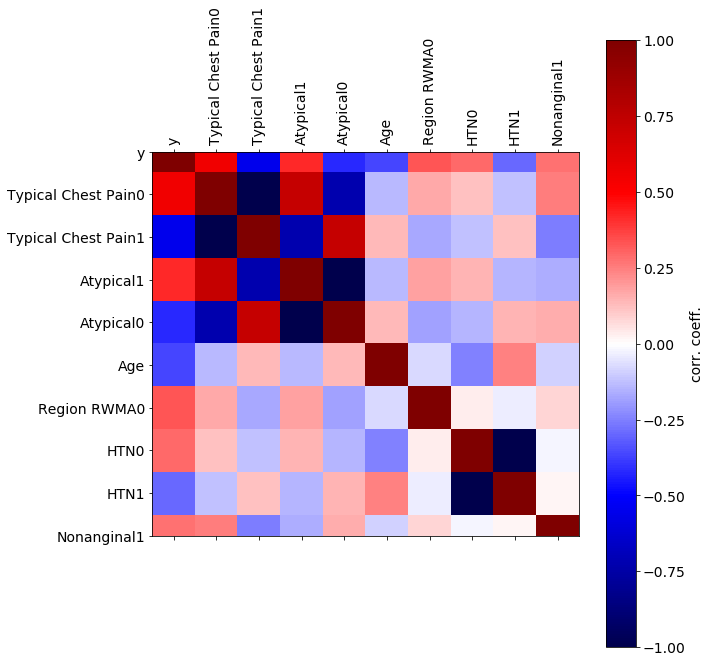

Index(['y', 'Typical Chest Pain0', 'Typical Chest Pain1', 'Atypical1',
       'Atypical0', 'Age', 'Region RWMA0', 'HTN0', 'HTN1', 'Nonanginal1',
       'Nonanginal0', 'DM1', 'DM0', 'BP', 'Tinversion0', 'Tinversion1',
       'EF-TTE', 'FBS', 'Region RWMA2', 'K', 'ESR', 'PR', 'Q Wave0', 'Q Wave1',
       'Diastolic Murmur1', 'Diastolic Murmur0', 'St Depression0',
       'St Depression1', 'Region RWMA3', 'Region RWMA4', 'St Elevation0',
       'St Elevation1', 'TG', 'Dyspnea1', 'Dyspnea0', 'Lymph', 'Neut',
       'Region RWMA1', 'Poor R Progression0', 'Poor R Progression1', 'PLT',
       'BUN', 'Function Class1', 'CRF1', 'CRF0', 'BBB1', 'CR',
       'Current Smoker1', 'Current Smoker0', 'Edema1', 'Edema0',
       'Airway disease1', 'Airway disease0', 'BBB0', 'Function Class0', 'Na',
       'Weak Peripheral Pulse0', 'Weak Peripheral Pulse1', 'BMI', 'Sex1',
       'Sex0', 'WBC', 'Weight', 'Function Class3', 'Function Class2',
       'LowTH Ang0', 'LowTH Ang1', 'LVH1', 'LVH0', 'Thyroid Disea

In [92]:
corrmat = df_preprocessed.corr()

# use the absolute value of the correlation matrix for sorting!
all_cols = np.abs(corrmat).sort_values('y',ascending=False)['y'].index 
cols = all_cols[:10] # positively correlated features

cm = corrmat.loc[cols,cols]

plt.figure(figsize=(10,10))
plt.matshow(cm,vmin=-1,vmax=1,cmap='seismic',fignum=0)
plt.colorbar(label='corr. coeff.')
plt.xticks(np.arange(cm.shape[0]),list(cols),rotation=90)
plt.yticks(np.arange(cm.shape[0]),list(cols))
plt.tight_layout()
plt.show()
all_cols

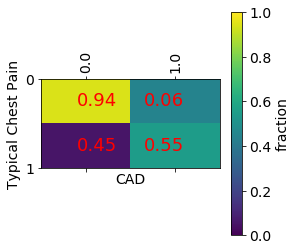

In [93]:
count_matrix = df_preprocessed.groupby(['Typical Chest Pain0', 'y']).size().unstack()
# print(count_matrix)

count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)
# print(count_matrix_norm)


plt.matshow(count_matrix_norm.T,vmin=0,vmax=1)
plt.xticks(np.arange(count_matrix_norm.shape[0]),count_matrix_norm.index,rotation=90)
plt.yticks(np.arange(count_matrix_norm.shape[1]),count_matrix_norm.columns)
plt.ylabel('Typical Chest Pain')
plt.xlabel('CAD')
plt.colorbar(label='fraction')
plt.text(0.65, 0.8, "0.55", fontsize=18,color='red')
plt.text(0.65, 0.3, "0.06", fontsize=18,color='red')
plt.text(-0.1, 0.3, "0.94", fontsize=18,color='red')
plt.text(-0.1, 0.8, "0.45", fontsize=18,color='red')
# plt.tight_layout()
plt.show()

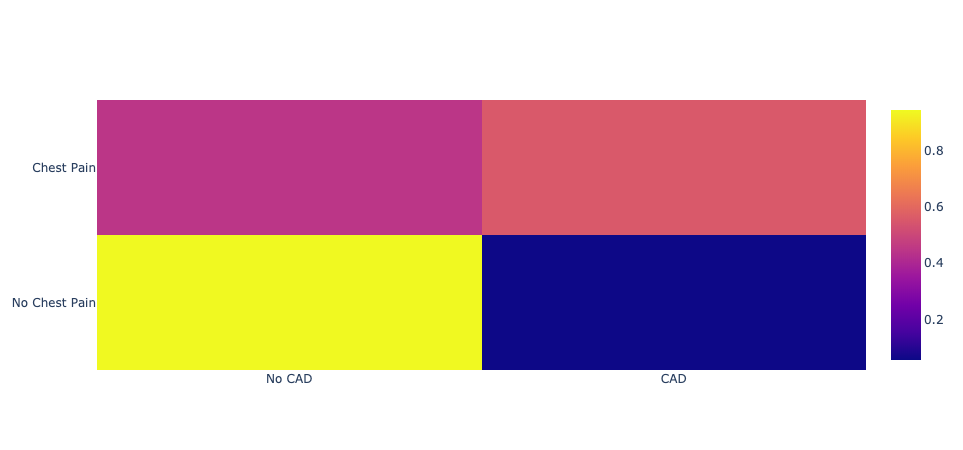

In [94]:
import plotly.graph_objects as go

fig = go.Figure(data=go.Heatmap(
                   z=count_matrix_norm,
                   x=['No CAD', 'CAD'],
                   y=['No Chest Pain', 'Chest Pain']))
fig.show()

In [95]:
count_matrix_norm[0][0]

cad_df = pd.DataFrame( {'Chest Pain':[ "yes","no","yes","no" ],
              'rate':[count_matrix_norm[0][0],count_matrix_norm[1][1],count_matrix_norm[1][0],count_matrix_norm[0][1]],
              "CAD": [ 'yes','yes','no','no' ]
              } )
cad_df

,Chest Pain,rate,CAD
0,yes,0.944785,yes
1,no,0.553957,yes
2,yes,0.055215,no
3,no,0.446043,no


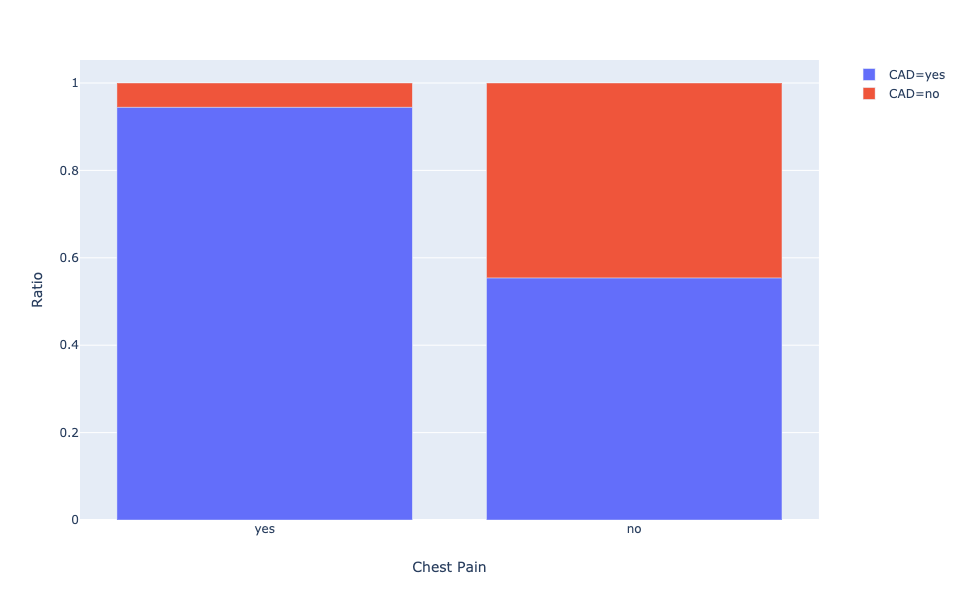

In [98]:
import plotly.express as px
import plotly
fig = px.bar(cad_df,x='Chest Pain',y="rate",color="CAD")
# plotly.io.orca.config.executable = '/path/to/orca'
# plotly.io.orca.config.save()
fig.update_layout(
    yaxis_title="Ratio"
)
fig.show()
# fig.write_image("fig1.png")

In [16]:
lab_df = pd.DataFrame( {'CAD':[ "yes","no" ],
              'ratio':[np.mean(df['Cath'] == 'Cad'),np.mean(df['Cath'] == 'Normal')],
              } )

np.mean(df['Cath'] == 'Cad')
np.mean(df['Cath'] == 'Normal')

0.2871287128712871

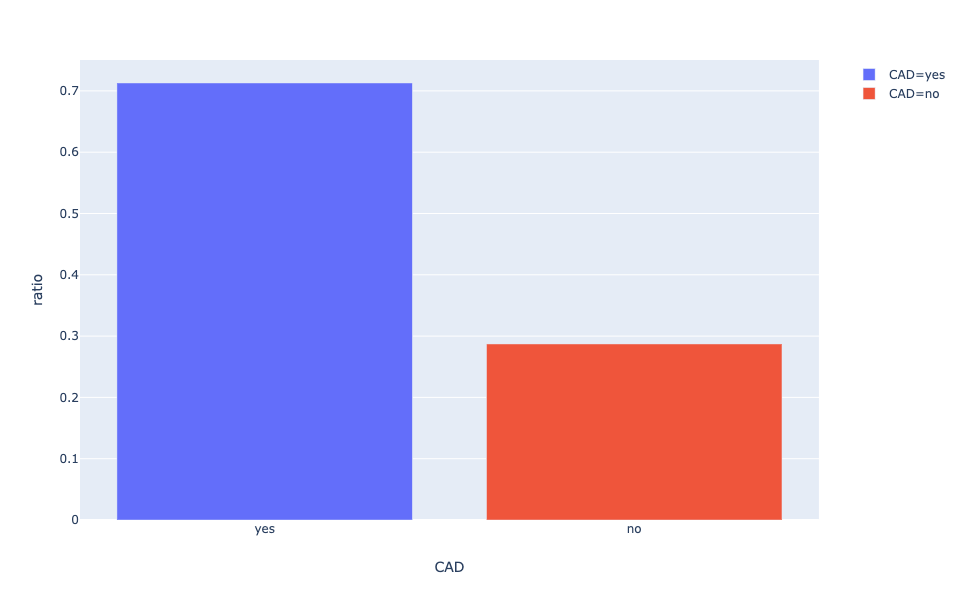

In [17]:
import plotly.express as px
fig = px.bar(lab_df,x='CAD',y="ratio",color="CAD")
fig.show()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning:


The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning:


The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.

No handles with labels found to put in legend.


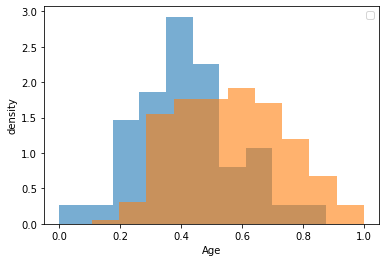

In [18]:
plt.hist(df_preprocessed['Age'][df_preprocessed['y'] == 1],alpha=0.6,normed=True)
plt.hist(df_preprocessed['Age'][df_preprocessed['y'] == 0],alpha=0.6,normed=True)
plt.ylabel('density')
plt.xlabel('Age')
plt.legend()
plt.show()

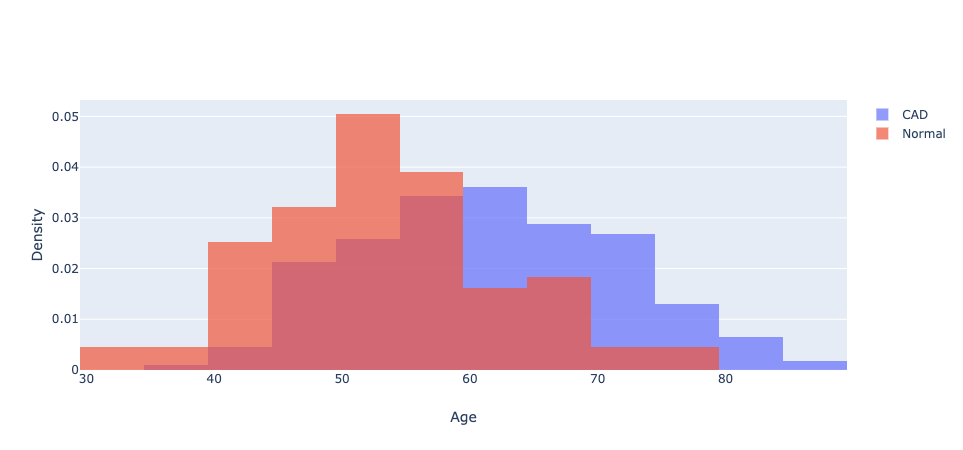

In [50]:
import plotly.express as px
# fig = px.histogram(df, x="Age", y="Cath", color="Cath",histnorm='probability density')
# fig.update_traces(opacity=0.5)
# fig.show()
import plotly.graph_objects as go

x0 = df['Age'][df['Cath'] == 'Cad']
# Add 1 to shift the mean of the Gaussian distribution
x1 = df['Age'][df['Cath'] == 'Normal']

fig = go.Figure()
fig.add_trace(go.Histogram(x=x0,histnorm='probability density',name='CAD'))
fig.add_trace(go.Histogram(x=x1,histnorm='probability density',name='Normal'))

# Overlay both histograms
fig.update_layout(barmode='overlay')
fig.update_layout(
    xaxis_title="Age",
    yaxis_title="Density"
#     font=dict(
#         family="Courier New, monospace",
#         size=18,
# #         color="#7f7f7f"
#     )
)
# Reduce opacity to see both histograms
fig.update_traces(opacity=0.7)
fig.show()

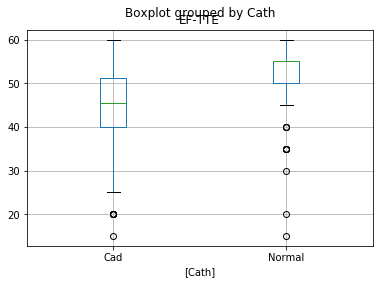

In [20]:
df[['EF-TTE','Cath']].boxplot(by='Cath')
# plt.plot([50, 0], [1, 50], 'k-', lw=.5,color='red')
plt.show()

In [81]:
df2 = df.copy()
for i in range(len(df['Cath'])):
    if df['Cath'][i] == 'Cad':
        df2['Cath'][i] = 'yes'
    else:
        df2['Cath'][i] = 'no'

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [82]:
df2['Cath'].describe()

count     303
unique      2
top       yes
freq      216
Name: Cath, dtype: object

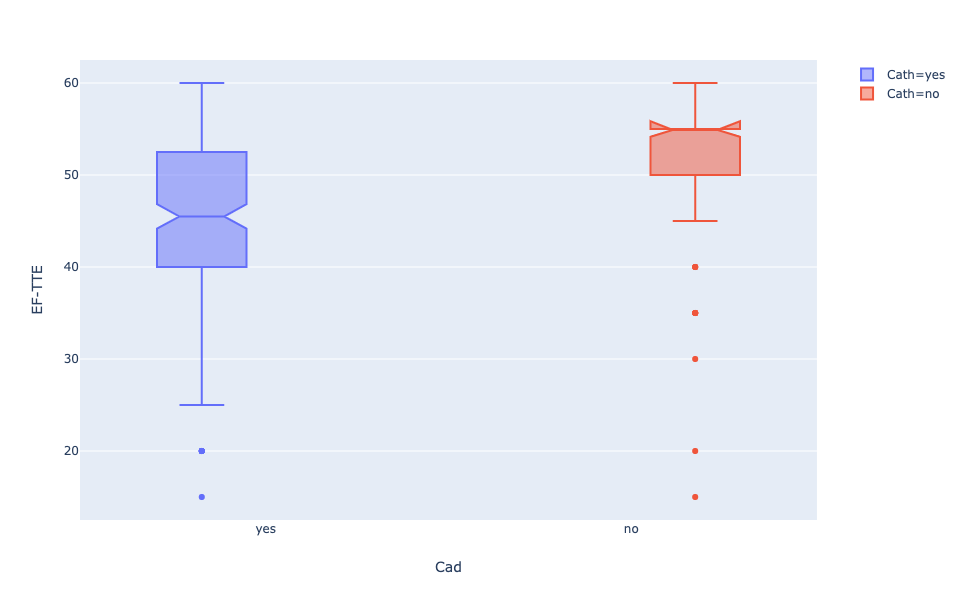

In [84]:
fig = px.box(df2, y='EF-TTE', x='Cath', color='Cath', notched=True)
fig.update_layout(
    xaxis_title="Cad"
)
fig.show()

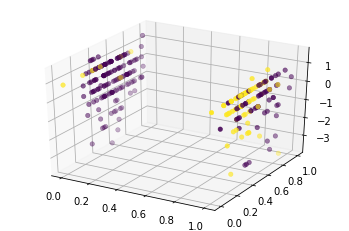

In [22]:
from mpl_toolkits import mplot3d
x = df_preprocessed["Typical Chest Pain0"]
y = df_preprocessed["Age"]
z = df_preprocessed["EF-TTE"]
# "Age" "Atypical0" 'Region RWMA0' "EF-TTE"
ax = plt.axes(projection='3d')
ax.scatter(x, y, z, c=df_preprocessed["y"], cmap='viridis', linewidth=0.5)

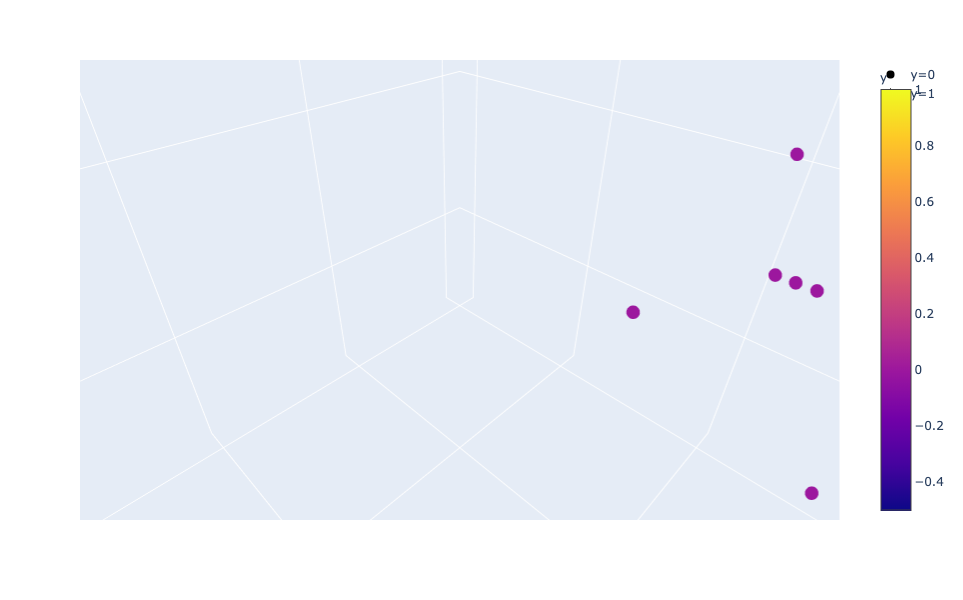

In [23]:
import plotly.express as px
fig = px.scatter_3d(df_preprocessed, x= "Typical Chest Pain0", y="Age", z="EF-TTE",
                    color="y", symbol="y")
# "Age" "Atypical0" 'Region RWMA0' "EF-TTE" 'HTN0' "Typical Chest Pain0"
fig.show()

In [24]:
feature_names = X.columns
from sklearn.feature_selection import f_classif, mutual_info_classif
y = df_preprocessed['y'].values
X = df_preprocessed.drop(columns=['y'])
from sklearn.feature_selection import SelectKBest
m_select = SelectKBest(mutual_info_classif,k=10)
m_select.fit_transform(X,y)
m_feature = feature_names[m_select.get_support()]
print(m_feature)

IndexError: boolean index did not match indexed array along dimension 0; dimension is 55 but corresponding boolean dimension is 93

In [ ]:
f_select = SelectKBest(f_classif,k=10)
f_select.fit_transform(X,y)
f_feature = feature_names[f_select.get_support()]
print(f_feature)

In [27]:
df_preprocessed['Typical Chest Pain0']==1

0      False
1       True
2      False
3       True
4       True
       ...  
297    False
298    False
299     True
300    False
301     True
Name: Typical Chest Pain0, Length: 302, dtype: bool

In [30]:
max(df_preprocessed['EF-TTE'])

1.4350341758600138

In [130]:
condn = (df_preprocessed['Typical Chest Pain0']==1).values * ((df_preprocessed['EF-TTE']-4.5*df_preprocessed['Age']+3.2)>=0).values

In [131]:
aa = df_preprocessed[condn]

a = aa[aa['y']==1].shape[0]

aa = df_preprocessed[np.logical_not(condn)]

b = aa[aa['y']==0].shape[0]

(a+b)/303

0.801980198019802

In [12]:
df.columns

Index(['Age', 'Weight', 'Length', 'Sex', 'BMI', 'DM', 'HTN', 'Current Smoker',
       'EX-Smoker', 'FH', 'Obesity', 'CRF', 'CVA', 'Airway disease',
       'Thyroid Disease', 'CHF', 'DLP', 'BP', 'PR', 'Edema',
       'Weak Peripheral Pulse', 'Lung rales', 'Systolic Murmur',
       'Diastolic Murmur', 'Typical Chest Pain', 'Dyspnea', 'Function Class',
       'Atypical', 'Nonanginal', 'Exertional CP', 'LowTH Ang', 'Q Wave',
       'St Elevation', 'St Depression', 'Tinversion', 'LVH',
       'Poor R Progression', 'BBB', 'FBS', 'CR', 'TG', 'LDL', 'HDL', 'BUN',
       'ESR', 'HB', 'K', 'Na', 'WBC', 'Lymph', 'Neut', 'PLT', 'EF-TTE',
       'Region RWMA', 'VHD', 'Cath'],
      dtype='object')

In [10]:
df.head()

,Age,Weight,Length,Sex,BMI,DM,HTN,Current Smoker,EX-Smoker,FH,...,K,Na,WBC,Lymph,Neut,PLT,EF-TTE,Region RWMA,VHD,Cath
0,53,90,175,Male,29.387755,0,1,1,0,0,...,4.7,141,5700,39,52,261,50,0,N,Cad
1,67,70,157,Fmale,28.398718,0,1,0,0,0,...,4.7,156,7700,38,55,165,40,4,N,Cad
2,54,54,164,Male,20.077335,0,0,1,0,0,...,4.7,139,7400,38,60,230,40,2,mild,Cad
3,66,67,158,Fmale,26.838648,0,1,0,0,0,...,4.4,142,13000,18,72,742,55,0,Severe,Normal
4,50,87,153,Fmale,37.165193,0,1,0,0,0,...,4.0,140,9200,55,39,274,50,0,Severe,Normal


In [3]:
cat_ftr = ["Sex",'Obesity','CRF', 'CVA','Airway disease','Thyroid Disease', 'CHF', 'DLP',
          'Weak Peripheral Pulse', 'Lung rales','Systolic Murmur','Diastolic Murmur','Dyspnea', 'Function Class',
          'Atypical', 'Nonanginal', 'Exertional CP', 'LowTH Ang','LVH','Poor R Progression', 'BBB','Region RWMA']
bi_ftr = ["DM","HTN","Current Smoker",'EX-Smoker','FH','Edema','Typical Chest Pain',
         'Q Wave','St Elevation', 'St Depression', 'Tinversion']
ord_ftr = ["VHD"]
cont_ftr = ["Age","Weight","Length","BMI",'BP', 'PR','FBS', 'CR', 'TG', 'LDL', 'HDL', 'BUN',
       'ESR', 'HB', 'K', 'Na', 'WBC', 'Lymph', 'Neut', 'PLT', 'EF-TTE']

In [4]:
import pandas as pd
import numpy as np
df = pd.read_csv('Z_sani.csv')
X = df.drop('Cath', axis=1)
y = df['Cath']
y

0         Cad
1         Cad
2         Cad
3      Normal
4      Normal
        ...  
298       Cad
299    Normal
300    Normal
301    Normal
302       Cad
Name: Cath, Length: 303, dtype: object

In [5]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(["Cad","Normal"])
y1 = pd.DataFrame({"y":le.transform(y)*-1+1})
df['Cath'] = y1
y = df['Cath']
y

0      1
1      1
2      1
3      0
4      0
      ..
298    1
299    0
300    0
301    0
302    1
Name: Cath, Length: 303, dtype: int64

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, fbeta_score
from sklearn.metrics import confusion_matrix

def logit_pip(X,y,random_state,n_folds):

    X_other, X_test, y_other, y_test = train_test_split(X, y, test_size=0.3, random_state = random_state[0])
    kf = StratifiedKFold(n_splits=n_folds,shuffle=True,random_state=random_state[1])
    CV_scores = []
    test_scores = []
    pre = []
    rec = []
    f13 = []
    cf = []

    for train_index, CV_index in kf.split(X_other,y_other):
        X_train, X_CV = X_other.iloc[train_index], X_other.iloc[CV_index]
        y_train, y_CV = y_other.iloc[train_index], y_other.iloc[CV_index]

        scaler = StandardScaler()
        oh = OneHotEncoder(sparse=False,handle_unknown = "ignore")
        od = OrdinalEncoder(categories = [['N','mild','Moderate','Severe']])
        X_train_cont = X_train[cont_ftr]
        X_train_cat = X_train[cat_ftr]
        X_train_od = X_train[ord_ftr]
        X_train_cont = scaler.fit_transform(X_train_cont)
        X_train_cat = oh.fit_transform(X_train_cat)
        X_train_od = od.fit_transform(X_train_od)
        X_train = np.concatenate((X_train_cont,X_train_cat,
                                  np.array(X_train[bi_ftr]),X_train_od),axis=1)

        X_c_cont = X_CV[cont_ftr]
        X_c_cat = X_CV[cat_ftr]
        X_c_od = X_CV[ord_ftr]
        X_c_cont = scaler.transform(X_c_cont)
        X_c_cat = oh.transform(X_c_cat)
        X_c_od = od.transform(X_c_od)
        X_c = np.concatenate((X_c_cont,X_c_cat,
                              np.array(X_CV[bi_ftr]),X_c_od),axis=1)

        X_t_cont = X_test[cont_ftr]
        X_t_cat = X_test[cat_ftr]
        X_t_od = X_test[ord_ftr]
        X_t_cont = scaler.transform(X_t_cont)
        X_t_cat = oh.transform(X_t_cat)
        X_t_od = od.transform(X_t_od)
        X_t = np.concatenate((X_t_cont,X_t_cat,
                              np.array(X_test[bi_ftr]),X_t_od),axis=1)

        cs = np.logspace(1,-3,num=50)
        train_score = []
        CV_score = []
        regs = []
        for c in cs:
            reg = LogisticRegression(penalty="l1",C=c,solver="saga",max_iter=10**4)
            reg.fit(X_train,y_train)
            train_score.append(accuracy_score(y_train,reg.predict(X_train)))
            CV_score.append(accuracy_score(y_CV,reg.predict(X_c)))
            regs.append(reg)
        best_c = cs[np.argmax(CV_score)]
        reg = regs[np.argmax(CV_score)]
        CV_scores.append(np.max(CV_score))
        test_scores.append(accuracy_score(y_test,reg.predict(X_t)))
        pre.append(precision_score(y_test,reg.predict(X_t)))
        rec.append(recall_score(y_test,reg.predict(X_t)))
        f13.append(fbeta_score(y_test,reg.predict(X_t),1.3))
#     cf.append(confusion_matrix(y,reg.predict(X)))
    return (CV_scores,test_scores,pre,rec,f13,best_c)

In [125]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, fbeta_score
from sklearn.metrics import confusion_matrix
import pickle

rst = np.array([[0, 0],[0, 0]])
for i in range(1,11):
    X_other, X_test, y_other, y_test = train_test_split(X, y, test_size=0.3, random_state = 10*i)
    scaler = StandardScaler()
    oh = OneHotEncoder(sparse=False,handle_unknown = "ignore")
    od = OrdinalEncoder(categories = [['N','mild','Moderate','Severe']])
    X_train_cont = X_other[cont_ftr]
    X_train_cat = X_other[cat_ftr]
    X_train_od = X_other[ord_ftr]
    X_train_cont = scaler.fit_transform(X_train_cont)
    X_train_cat = oh.fit_transform(X_train_cat)
    X_train_od = od.fit_transform(X_train_od)
    X_train = np.concatenate((X_train_cont,X_train_cat,
                              np.array(X_other[bi_ftr]),X_train_od),axis=1)
    X_t_cont = X_test[cont_ftr]
    X_t_cat = X_test[cat_ftr]
    X_t_od = X_test[ord_ftr]
    X_t_cont = scaler.transform(X_t_cont)
    X_t_cat = oh.transform(X_t_cat)
    X_t_od = od.transform(X_t_od)
    X_t = np.concatenate((X_t_cont,X_t_cat,
                          np.array(X_test[bi_ftr]),X_t_od),axis=1)
    reg = LogisticRegression(penalty="l1",C=0.7196,solver="saga",max_iter=10**4)
    pickle.dump(reg, open("logi.sav", 'wb'))
    reg.fit(X_train,y_other)
    rst = rst + np.array(confusion_matrix(y_test,reg.predict(X_t))/sum(confusion_matrix(y_test,reg.predict(X_t))))
rst/10

array([[0.77251082, 0.09019257],
       [0.22748918, 0.90980743]])

In [55]:
ac, pre, rec, f13 = [], [], [], []
for i in range(1,6):
    op = logit_pip(X,y,[10*i,14*i],10)
    ac.append(np.mean(op[1]))
    pre.append(np.mean(op[2]))
    rec.append(np.mean(op[3]))
    f13.append(np.mean(op[4]))
print("Mean of test accuracy scores: " + str(np.mean(ac)))
print("Std of test accuracy scores: " + str(np.std(ac)))

print("Mean of test pre scores: " + str(np.mean(pre)))
print("Std of test pre scores: " + str(np.std(pre)))

print("Mean of test rec scores: " + str(np.mean(rec)))
print("Std of test rec scores: " + str(np.std(rec)))

print("Mean of test f13 scores: " + str(np.mean(f13)))
print("Std of test f13 scores: " + str(np.std(f13)))

print(op[5])

Mean of test accuracy scores: 0.8712087912087911
Std of test accuracy scores: 0.02964508490544158
Mean of test pre scores: 0.9075312657856559
Std of test pre scores: 0.021021791213951573
Mean of test rec scores: 0.9154492094016575
Std of test rec scores: 0.03328649551064279
Mean of test f13 scores: 0.9121292381351221
Std of test f13 scores: 0.025215248081666267
0.7196856730011522


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

def rf_pip(X,y,random_state,n_folds):
    
    X_other, X_test, y_other, y_test = train_test_split(X, y, test_size=0.3, random_state = random_state[0])
    kf = StratifiedKFold(n_splits=n_folds,shuffle=True,random_state=random_state[1])
    CV_scores = []
    test_scores = []
    pre = []
    rec = []
    f13 = []
    cf = []
    
    for train_index, CV_index in kf.split(X_other,y_other):
        X_train, X_CV = X_other.iloc[train_index], X_other.iloc[CV_index]
        y_train, y_CV = y_other.iloc[train_index], y_other.iloc[CV_index]

        scaler = StandardScaler()
        oh = OneHotEncoder(sparse=False,handle_unknown = "ignore")
        od = OrdinalEncoder(categories = [['N','mild','Moderate','Severe']])
        X_train_cont = X_train[cont_ftr]
        X_train_cat = X_train[cat_ftr]
        X_train_od = X_train[ord_ftr]
        X_train_cont = scaler.fit_transform(X_train_cont)
        X_train_cat = oh.fit_transform(X_train_cat)
        X_train_od = od.fit_transform(X_train_od)
        X_train = np.concatenate((X_train_cont,X_train_cat,
                                  np.array(X_train[bi_ftr]),X_train_od),axis=1)

        X_c_cont = X_CV[cont_ftr]
        X_c_cat = X_CV[cat_ftr]
        X_c_od = X_CV[ord_ftr]
        X_c_cont = scaler.transform(X_c_cont)
        X_c_cat = oh.transform(X_c_cat)
        X_c_od = od.transform(X_c_od)
        X_c = np.concatenate((X_c_cont,X_c_cat,
                              np.array(X_CV[bi_ftr]),X_c_od),axis=1)

        X_t_cont = X_test[cont_ftr]
        X_t_cat = X_test[cat_ftr]
        X_t_od = X_test[ord_ftr]
        X_t_cont = scaler.transform(X_t_cont)
        X_t_cat = oh.transform(X_t_cat)
        X_t_od = od.transform(X_t_od)
        X_t = np.concatenate((X_t_cont,X_t_cat,
                              np.array(X_test[bi_ftr]),X_t_od),axis=1)

        train_score = []
        CV_score = []
        regs = []
        par = range(2,11)
        par_ls = []
        for i in par:
            for j in par:
                reg = RandomForestClassifier(random_state = random_state[2], max_depth=i, 
                                             1=j,n_estimators = 50)
                reg.fit(X_train,y_train)
                train_score.append(accuracy_score(y_train,reg.predict(X_train)))
                CV_score.append(accuracy_score(y_CV,reg.predict(X_c)))
                regs.append(reg)
        best_par = (par[np.argmax(CV_score)//len(par)],par[np.argmin(CV_score)%len(par)])
        reg = regs[np.argmax(CV_score)]
        CV_scores.append(np.max(CV_score))
        test_scores.append(accuracy_score(y_test,reg.predict(X_t)))
        pre.append(precision_score(y_test,reg.predict(X_t)))
        rec.append(recall_score(y_test,reg.predict(X_t)))
        f13.append(fbeta_score(y_test,reg.predict(X_t),1.3))
#     cf.append(confusion_matrix(y,reg.predict(X)))
    return (CV_scores,test_scores,pre,rec,f13,best_par)

In [12]:
ac, pre, rec, f13 = [], [], [], []
for i in range(1,6):
    op = rf_pip(X,y,[10*i,14*i,96*i],10)
    ac.append(np.mean(op[1]))
    pre.append(np.mean(op[2]))
    rec.append(np.mean(op[3]))
    f13.append(np.mean(op[4]))
print("Mean of test accuracy scores: " + str(np.mean(ac)))
print("Std of test accuracy scores: " + str(np.std(ac)))

print("Mean of test pre scores: " + str(np.mean(pre)))
print("Std of test pre scores: " + str(np.std(pre)))

print("Mean of test rec scores: " + str(np.mean(rec)))
print("Std of test rec scores: " + str(np.std(rec)))

print("Mean of test f13 scores: " + str(np.mean(f13)))
print("Std of test f13 scores: " + str(np.std(f13)))

print(op[5])

Mean of test accuracy scores: 0.8529670329670329
Std of test accuracy scores: 0.03738460892429093
Mean of test pre scores: 0.8627126522312144
Std of test pre scores: 0.032638098990344366
Mean of test rec scores: 0.9481058404217496
Std of test rec scores: 0.024651559000567664
Mean of test f13 scores: 0.9140520463816664
Std of test f13 scores: 0.0262678079402074
(6, 2)


In [124]:
from sklearn.ensemble import RandomForestClassifier

rst = np.array([[0, 0],[0, 0]])
for i in range(1,11):
    X_other, X_test, y_other, y_test = train_test_split(X, y, test_size=0.3, random_state = 10*i)
    scaler = StandardScaler()
    oh = OneHotEncoder(sparse=False,handle_unknown = "ignore")
    od = OrdinalEncoder(categories = [['N','mild','Moderate','Severe']])
    X_train_cont = X_other[cont_ftr]
    X_train_cat = X_other[cat_ftr]
    X_train_od = X_other[ord_ftr]
    X_train_cont = scaler.fit_transform(X_train_cont)
    X_train_cat = oh.fit_transform(X_train_cat)
    X_train_od = od.fit_transform(X_train_od)
    X_train = np.concatenate((X_train_cont,X_train_cat,
                              np.array(X_other[bi_ftr]),X_train_od),axis=1)
    X_t_cont = X_test[cont_ftr]
    X_t_cat = X_test[cat_ftr]
    X_t_od = X_test[ord_ftr]
    X_t_cont = scaler.transform(X_t_cont)
    X_t_cat = oh.transform(X_t_cat)
    X_t_od = od.transform(X_t_od)
    X_t = np.concatenate((X_t_cont,X_t_cat,
                          np.array(X_test[bi_ftr]),X_t_od),axis=1)
    reg = RandomForestClassifier(random_state = 14, max_depth=6, 
                                             min_samples_split=2,n_estimators = 50)
    pickle.dump(reg, open("rf.sav", 'wb'))
    reg.fit(X_train,y_other)
    rst = rst + np.array(confusion_matrix(y_test,reg.predict(X_t))/sum(confusion_matrix(y_test,reg.predict(X_t))))
rst/10

array([[0.80682802, 0.13356805],
       [0.19317198, 0.86643195]])

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn import svm
from sklearn.metrics import accuracy_score

def svm_pip(X,y,random_state,n_folds):
    
    X_other, X_test, y_other, y_test = train_test_split(X, y, test_size=0.3, random_state = random_state[0])
    kf = StratifiedKFold(n_splits=n_folds,shuffle=True,random_state=random_state[1])
    CV_scores = []
    test_scores = []
    pre = []
    rec = []
    f13 = []
    cf = []
    
    for train_index, CV_index in kf.split(X_other,y_other):
        X_train, X_CV = X_other.iloc[train_index], X_other.iloc[CV_index]
        y_train, y_CV = y_other.iloc[train_index], y_other.iloc[CV_index]

        scaler = StandardScaler()
        oh = OneHotEncoder(sparse=False,handle_unknown = "ignore")
        od = OrdinalEncoder(categories = [['N','mild','Moderate','Severe']])
        X_train_cont = X_train[cont_ftr]
        X_train_cat = X_train[cat_ftr]
        X_train_od = X_train[ord_ftr]
        X_train_cont = scaler.fit_transform(X_train_cont)
        X_train_cat = oh.fit_transform(X_train_cat)
        X_train_od = od.fit_transform(X_train_od)
        X_train = np.concatenate((X_train_cont,X_train_cat,
                                  np.array(X_train[bi_ftr]),X_train_od),axis=1)

        X_c_cont = X_CV[cont_ftr]
        X_c_cat = X_CV[cat_ftr]
        X_c_od = X_CV[ord_ftr]
        X_c_cont = scaler.transform(X_c_cont)
        X_c_cat = oh.transform(X_c_cat)
        X_c_od = od.transform(X_c_od)
        X_c = np.concatenate((X_c_cont,X_c_cat,
                              np.array(X_CV[bi_ftr]),X_c_od),axis=1)

        X_t_cont = X_test[cont_ftr]
        X_t_cat = X_test[cat_ftr]
        X_t_od = X_test[ord_ftr]
        X_t_cont = scaler.transform(X_t_cont)
        X_t_cat = oh.transform(X_t_cat)
        X_t_od = od.transform(X_t_od)
        X_t = np.concatenate((X_t_cont,X_t_cat,
                              np.array(X_test[bi_ftr]),X_t_od),axis=1)

        train_score = []
        CV_score = []
        regs = []
        par = np.logspace(6,-2,num=55)
        for i in par:
            for j in par:
                reg = svm.SVC(C=i, gamma=j)
                reg.fit(X_train,y_train)
                train_score.append(accuracy_score(y_train,reg.predict(X_train)))
                CV_score.append(accuracy_score(y_CV,reg.predict(X_c)))
                regs.append(reg)
        best_par = (par[np.argmax(CV_score)//len(par)],par[np.argmin(CV_score)%len(par)])
        reg = regs[np.argmax(CV_score)]
        CV_scores.append(np.max(CV_score))
        test_scores.append(accuracy_score(y_test,reg.predict(X_t)))
        pre.append(precision_score(y_test,reg.predict(X_t)))
        rec.append(recall_score(y_test,reg.predict(X_t)))
        f13.append(fbeta_score(y_test,reg.predict(X_t),1.3))
#     cf.append(confusion_matrix(y,reg.predict(X)))
    return (CV_scores,test_scores,pre,rec,f13,best_par)

In [63]:
ac, pre, rec, f13 = [], [], [], []
for i in range(1,6):
    op = svm_pip(X,y,[10*i,14*i,96*i],10)
    ac.append(np.mean(op[1]))
    pre.append(np.mean(op[2]))
    rec.append(np.mean(op[3]))
    f13.append(np.mean(op[4]))
print("Mean of test accuracy scores: " + str(np.mean(ac)))
print("Std of test accuracy scores: " + str(np.std(ac)))

print("Mean of test pre scores: " + str(np.mean(pre)))
print("Std of test pre scores: " + str(np.std(pre)))

print("Mean of test rec scores: " + str(np.mean(rec)))
print("Std of test rec scores: " + str(np.std(rec)))

print("Mean of test f13 scores: " + str(np.mean(f13)))
print("Std of test f13 scores: " + str(np.std(f13)))

print(op[5])

Mean of test accuracy scores: 0.8468131868131868
Std of test accuracy scores: 0.04145406858145874
Mean of test pre scores: 0.8788956205180259
Std of test pre scores: 0.03676566027103305
Mean of test rec scores: 0.9184276291626476
Std of test rec scores: 0.030045370548996923
Mean of test f13 scores: 0.9021060866759167
Std of test f13 scores: 0.028137773642411375
(1.6681005372000592, 1000000.0)


In [128]:
from sklearn import svm

rst = np.array([[0, 0],[0, 0]])
for i in range(1,11):
    X_other, X_test, y_other, y_test = train_test_split(X, y, test_size=0.3, random_state = 10*i)
    scaler = StandardScaler()
    oh = OneHotEncoder(sparse=False,handle_unknown = "ignore")
    od = OrdinalEncoder(categories = [['N','mild','Moderate','Severe']])
    X_train_cont = X_other[cont_ftr]
    X_train_cat = X_other[cat_ftr]
    X_train_od = X_other[ord_ftr]
    X_train_cont = scaler.fit_transform(X_train_cont)
    X_train_cat = oh.fit_transform(X_train_cat)
    X_train_od = od.fit_transform(X_train_od)
    X_train = np.concatenate((X_train_cont,X_train_cat,
                              np.array(X_other[bi_ftr]),X_train_od),axis=1)
    X_t_cont = X_test[cont_ftr]
    X_t_cat = X_test[cat_ftr]
    X_t_od = X_test[ord_ftr]
    X_t_cont = scaler.transform(X_t_cont)
    X_t_cat = oh.transform(X_t_cat)
    X_t_od = od.transform(X_t_od)
    X_t = np.concatenate((X_t_cont,X_t_cat,
                          np.array(X_test[bi_ftr]),X_t_od),axis=1)
    print(X_t.shape)
    reg = svm.SVC(C=1567, gamma=.015632)
    pickle.dump(reg, open("svm.sav", 'wb'))
    reg.fit(X_train,y_other)
    rst = rst + np.array( confusion_matrix(y_test,reg.predict(X_t)) /sum(confusion_matrix(y_test,reg.predict(X_t))))
rst/10

(91, 82)
(91, 80)
(91, 82)
(91, 82)
(91, 81)
(91, 81)
(91, 82)
(91, 82)
(91, 82)
(91, 82)


array([[0.74809808, 0.10061025],
       [0.25190192, 0.89938975]])

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

def knn_pip(X,y,random_state,n_folds):
    
    X_other, X_test, y_other, y_test = train_test_split(X, y, test_size=0.3, random_state = random_state[0])
    kf = StratifiedKFold(n_splits=n_folds,shuffle=True,random_state=random_state[1])
    CV_scores = []
    test_scores = []
    pre = []
    rec = []
    f13 = []
    cf = []
    
    for train_index, CV_index in kf.split(X_other,y_other):
        X_train, X_CV = X_other.iloc[train_index], X_other.iloc[CV_index]
        y_train, y_CV = y_other.iloc[train_index], y_other.iloc[CV_index]

        scaler = StandardScaler()
        oh = OneHotEncoder(sparse=False,handle_unknown = "ignore")
        od = OrdinalEncoder(categories = [['N','mild','Moderate','Severe']])
        X_train_cont = X_train[cont_ftr]
        X_train_cat = X_train[cat_ftr]
        X_train_od = X_train[ord_ftr]
        X_train_cont = scaler.fit_transform(X_train_cont)
        X_train_cat = oh.fit_transform(X_train_cat)
        X_train_od = od.fit_transform(X_train_od)
        X_train = np.concatenate((X_train_cont,X_train_cat,
                                  np.array(X_train[bi_ftr]),X_train_od),axis=1)

        X_c_cont = X_CV[cont_ftr]
        X_c_cat = X_CV[cat_ftr]
        X_c_od = X_CV[ord_ftr]
        X_c_cont = scaler.transform(X_c_cont)
        X_c_cat = oh.transform(X_c_cat)
        X_c_od = od.transform(X_c_od)
        X_c = np.concatenate((X_c_cont,X_c_cat,
                              np.array(X_CV[bi_ftr]),X_c_od),axis=1)

        X_t_cont = X_test[cont_ftr]
        X_t_cat = X_test[cat_ftr]
        X_t_od = X_test[ord_ftr]
        X_t_cont = scaler.transform(X_t_cont)
        X_t_cat = oh.transform(X_t_cat)
        X_t_od = od.transform(X_t_od)
        X_t = np.concatenate((X_t_cont,X_t_cat,
                              np.array(X_test[bi_ftr]),X_t_od),axis=1)

        train_score = []
        CV_score = []
        regs = []
        par = range(3,15)
        for i in par:
            for j in par:
                reg = KNeighborsClassifier(l=i, weights='distance',p=j)
                reg.fit(X_train,y_train)
                train_score.append(accuracy_score(y_train,reg.predict(X_train)))
                CV_score.append(accuracy_score(y_CV,reg.predict(X_c)))
                regs.append(reg)
        best_par = (par[np.argmax(CV_score)//len(par)],par[np.argmin(CV_score)%len(par)])
        reg = regs[np.argmax(CV_score)]
        CV_scores.append(np.max(CV_score))
        test_scores.append(accuracy_score(y_test,reg.predict(X_t)))
        pre.append(precision_score(y_test,reg.predict(X_t)))
        rec.append(recall_score(y_test,reg.predict(X_t)))
        f13.append(fbeta_score(y_test,reg.predict(X_t),1.3))
#     cf.append(confusion_matrix(y,reg.predict(X)))
    return (CV_scores,test_scores,pre,rec,f13,best_par)

In [65]:
ac, pre, rec, f13 = [], [], [], []
for i in range(1,6):
    op = knn_pip(X,y,[10*i,14*i,96*i],10)
    ac.append(np.mean(op[1]))
    pre.append(np.mean(op[2]))
    rec.append(np.mean(op[3]))
    f13.append(np.mean(op[4]))
print("Mean of test accuracy scores: " + str(np.mean(ac)))
print("Std of test accuracy scores: " + str(np.std(ac)))

print("Mean of test pre scores: " + str(np.mean(pre)))
print("Std of test pre scores: " + str(np.std(pre)))

print("Mean of test rec scores: " + str(np.mean(rec)))
print("Std of test rec scores: " + str(np.std(rec)))

print("Mean of test f13 scores: " + str(np.mean(f13)))
print("Std of test f13 scores: " + str(np.std(f13)))

print(op[5])

Mean of test accuracy scores: 0.7538461538461538
Std of test accuracy scores: 0.03094143335451086
Mean of test pre scores: 0.8033191959815273
Std of test pre scores: 0.04699947984213723
Mean of test rec scores: 0.879563580269785
Std of test rec scores: 0.01466150703880407
Mean of test f13 scores: 0.8479388098180582
Std of test f13 scores: 0.015656154407450853
(3, 13)


In [110]:
from sklearn.neighbors import KNeighborsClassifier

rst = np.array([[0, 0],[0, 0]])
for i in range(1,6):
    X_other, X_test, y_other, y_test = train_test_split(X, y, test_size=0.3, random_state = 14*i)
    scaler = StandardScaler()
    oh = OneHotEncoder(sparse=False,handle_unknown = "ignore")
    od = OrdinalEncoder(categories = [['N','mild','Moderate','Severe']])
    X_train_cont = X_other[cont_ftr]
    X_train_cat = X_other[cat_ftr]
    X_train_od = X_other[ord_ftr]
    X_train_cont = scaler.fit_transform(X_train_cont)
    X_train_cat = oh.fit_transform(X_train_cat)
    X_train_od = od.fit_transform(X_train_od)
    X_train = np.concatenate((X_train_cont,X_train_cat,
                              np.array(X_other[bi_ftr]),X_train_od),axis=1)
    X_t_cont = X_test[cont_ftr]
    X_t_cat = X_test[cat_ftr]
    X_t_od = X_test[ord_ftr]
    X_t_cont = scaler.transform(X_t_cont)
    X_t_cat = oh.transform(X_t_cat)
    X_t_od = od.transform(X_t_od)
    X_t = np.concatenate((X_t_cont,X_t_cat,
                          np.array(X_test[bi_ftr]),X_t_od),axis=1)
    reg = KNeighborsClassifier(n_neighbors=3, weights='distance',p=13)
    pickle.dump(reg, open("knn.sav", 'wb'))
    reg.fit(X_train,y_other)
    rst = rst + np.array(confusion_matrix(y_test,reg.predict(X_t))/sum(confusion_matrix(y_test,reg.predict(X_t))))
rst/5

array([[0.40148148, 0.26588536],
       [0.59851852, 0.73411464]])

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, fbeta_score
from sklearn.metrics import confusion_matrix

def ada_pip(X,y,random_state,n_folds):
    
    X_other, X_test, y_other, y_test = train_test_split(X, y, test_size=0.3, random_state = random_state[0])
    kf = StratifiedKFold(n_splits=n_folds,shuffle=True,random_state=random_state[1])
    CV_scores = []
    test_scores = []
    pre = []
    rec = []
    f13 = []
    cf = []
    
    for train_index, CV_index in kf.split(X_other,y_other):
        X_train, X_CV = X_other.iloc[train_index], X_other.iloc[CV_index]
        y_train, y_CV = y_other.iloc[train_index], y_other.iloc[CV_index]

        scaler = StandardScaler()
        oh = OneHotEncoder(sparse=False,handle_unknown = "ignore")
        od = OrdinalEncoder(categories = [['N','mild','Moderate','Severe']])
        X_train_cont = X_train[cont_ftr]
        X_train_cat = X_train[cat_ftr]
        X_train_od = X_train[ord_ftr]
        X_train_cont = scaler.fit_transform(X_train_cont)
        X_train_cat = oh.fit_transform(X_train_cat)
        X_train_od = od.fit_transform(X_train_od)
        X_train = np.concatenate((X_train_cont,X_train_cat,
                                  np.array(X_train[bi_ftr]),X_train_od),axis=1)

        X_c_cont = X_CV[cont_ftr]
        X_c_cat = X_CV[cat_ftr]
        X_c_od = X_CV[ord_ftr]
        X_c_cont = scaler.transform(X_c_cont)
        X_c_cat = oh.transform(X_c_cat)
        X_c_od = od.transform(X_c_od)
        X_c = np.concatenate((X_c_cont,X_c_cat,
                              np.array(X_CV[bi_ftr]),X_c_od),axis=1)

        X_t_cont = X_test[cont_ftr]
        X_t_cat = X_test[cat_ftr]
        X_t_od = X_test[ord_ftr]
        X_t_cont = scaler.transform(X_t_cont)
        X_t_cat = oh.transform(X_t_cat)
        X_t_od = od.transform(X_t_od)
        X_t = np.concatenate((X_t_cont,X_t_cat,
                              np.array(X_test[bi_ftr]),X_t_od),axis=1)

        train_score = []
        CV_score = []
        regs = []
        par1 = range(1,15)
        par2 = np.logspace(1,-4,num=25)
        for i in par1:
            for j in par2:
                reg = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=i),learning_rate=j,
                                         n_estimators=100, random_state=random_state[2])
                reg.fit(X_train,y_train)
                train_score.append(accuracy_score(y_train,reg.predict(X_train)))
                CV_score.append(accuracy_score(y_CV,reg.predict(X_c)))
                regs.append(reg)
        best_par = (par1[np.argmax(CV_score)//(len(par1))],
                   par2[np.argmax(CV_score)%(len(par1))])
        reg = regs[np.argmax(CV_score)]
        CV_scores.append(np.max(CV_score))
        test_scores.append(accuracy_score(y_test,reg.predict(X_t)))
        pre.append(precision_score(y_test,reg.predict(X_t)))
        rec.append(recall_score(y_test,reg.predict(X_t)))
        f13.append(fbeta_score(y_test,reg.predict(X_t),1.3))
#     cf.append(confusion_matrix(y,reg.predict(X)))
    return (CV_scores,test_scores,pre,rec,f13,best_par)

In [7]:
ac, pre, rec, f13 = [], [], [], []
for i in range(1,6):
    op = ada_pip(X,y,[10*i,14*i,96*i],10)
    ac.append(np.mean(op[1]))
    pre.append(np.mean(op[2]))
    rec.append(np.mean(op[3]))
    f13.append(np.mean(op[4]))
print("Mean of test accuracy scores: " + str(np.mean(ac)))
print("Std of test accuracy scores: " + str(np.std(ac)))

print("Mean of test pre scores: " + str(np.mean(pre)))
print("Std of test pre scores: " + str(np.std(pre)))

print("Mean of test rec scores: " + str(np.mean(rec)))
print("Std of test rec scores: " + str(np.std(rec)))

print("Mean of test f13 scores: " + str(np.mean(f13)))
print("Std of test f13 scores: " + str(np.std(f13)))

print(op[5])

Mean of test accuracy scores: 0.82
Std of test accuracy scores: 0.0278557881630855
Mean of test pre scores: 0.8771587833890326
Std of test pre scores: 0.017326820039221192
Mean of test rec scores: 0.8762407603576724
Std of test rec scores: 0.036218198118151294
Mean of test f13 scores: 0.8752367391458545
Std of test f13 scores: 0.024654969591772012
(6, 0.019573417814876596)


In [109]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

rst = np.array([[0, 0],[0, 0]])
for i in range(1,11):
    X_other, X_test, y_other, y_test = train_test_split(X, y, test_size=0.3, random_state = 14*i)
    scaler = StandardScaler()
    oh = OneHotEncoder(sparse=False,handle_unknown = "ignore")
    od = OrdinalEncoder(categories = [['N','mild','Moderate','Severe']])
    X_train_cont = X_other[cont_ftr]
    X_train_cat = X_other[cat_ftr]
    X_train_od = X_other[ord_ftr]
    X_train_cont = scaler.fit_transform(X_train_cont)
    X_train_cat = oh.fit_transform(X_train_cat)
    X_train_od = od.fit_transform(X_train_od)
    X_train = np.concatenate((X_train_cont,X_train_cat,
                              np.array(X_other[bi_ftr]),X_train_od),axis=1)
    X_t_cont = X_test[cont_ftr]
    X_t_cat = X_test[cat_ftr]
    X_t_od = X_test[ord_ftr]
    X_t_cont = scaler.transform(X_t_cont)
    X_t_cat = oh.transform(X_t_cat)
    X_t_od = od.transform(X_t_od)
    X_t = np.concatenate((X_t_cont,X_t_cat,
                          np.array(X_test[bi_ftr]),X_t_od),axis=1)
    reg = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=6),learning_rate=0.1957,
                                         n_estimators=100, random_state=16*i)
    pickle.dump(reg, open("ada.sav", 'wb'))
    reg.fit(X_train,y_other)
    rst = rst + np.array(confusion_matrix(y_test,reg.predict(X_t))/sum(confusion_matrix(y_test,reg.predict(X_t))))
rst/10

array([[0.69959262, 0.15102953],
       [0.30040738, 0.84897047]])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, fbeta_score
from sklearn.ensemble import GradientBoostingClassifier

def xg_pip(X,y,random_state,n_folds):
    
    X_other, X_test, y_other, y_test = train_test_split(X, y, test_size=0.3, random_state = random_state[0])
    kf = StratifiedKFold(n_splits=n_folds,shuffle=True,random_state=random_state[1])
    CV_scores = []
    test_scores = []
    pre = []
    rec = []
    f13 = []
    cf = []
    
    for train_index, CV_index in kf.split(X_other,y_other):
        X_train, X_CV = X_other.iloc[train_index], X_other.iloc[CV_index]
        y_train, y_CV = y_other.iloc[train_index], y_other.iloc[CV_index]

        scaler = StandardScaler()
        oh = OneHotEncoder(sparse=False,handle_unknown = "ignore")
        od = OrdinalEncoder(categories = [['N','mild','Moderate','Severe']])
        X_train_cont = X_train[cont_ftr]
        X_train_cat = X_train[cat_ftr]
        X_train_od = X_train[ord_ftr]
        X_train_cont = scaler.fit_transform(X_train_cont)
        X_train_cat = oh.fit_transform(X_train_cat)
        X_train_od = od.fit_transform(X_train_od)
        X_train = np.concatenate((X_train_cont,X_train_cat,
                                  np.array(X_train[bi_ftr]),X_train_od),axis=1)

        X_c_cont = X_CV[cont_ftr]
        X_c_cat = X_CV[cat_ftr]
        X_c_od = X_CV[ord_ftr]
        X_c_cont = scaler.transform(X_c_cont)
        X_c_cat = oh.transform(X_c_cat)
        X_c_od = od.transform(X_c_od)
        X_c = np.concatenate((X_c_cont,X_c_cat,
                              np.array(X_CV[bi_ftr]),X_c_od),axis=1)

        X_t_cont = X_test[cont_ftr]
        X_t_cat = X_test[cat_ftr]
        X_t_od = X_test[ord_ftr]
        X_t_cont = scaler.transform(X_t_cont)
        X_t_cat = oh.transform(X_t_cat)
        X_t_od = od.transform(X_t_od)
        X_t = np.concatenate((X_t_cont,X_t_cat,
                              np.array(X_test[bi_ftr]),X_t_od),axis=1)

        train_score = []
        CV_score = []
        regs = []
        par1 = range(10,201,10)
        par2 = np.logspace(1,-4,num=25)
        for i in par1:
            for j in par2:
                reg = GradientBoostingClassifier(n_estimators=i,learning_rate=j,
                                          random_state=random_state[2])
                reg.fit(X_train,y_train)
                train_score.append(accuracy_score(y_train,reg.predict(X_train)))
                CV_score.append(accuracy_score(y_CV,reg.predict(X_c)))
                regs.append(reg)
#         best_par = (par1[np.argmax(CV_score)//(len(par1))],
#                    par2[np.argmax(CV_score)%(len(par1))])
        reg = regs[np.argmax(CV_score)]
        CV_scores.append(np.max(CV_score))
        test_scores.append(accuracy_score(y_test,reg.predict(X_t)))
        pre.append(precision_score(y_test,reg.predict(X_t)))
        rec.append(recall_score(y_test,reg.predict(X_t)))
        f13.append(fbeta_score(y_test,reg.predict(X_t),1.3))
#     cf.append(confusion_matrix(y,reg.predict(X)))
    return (CV_scores,test_scores,pre,rec,f13)


In [108]:
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.tree import DecisionTreeClassifier

rst = np.array([[0, 0],[0, 0]])
for i in range(1,6):
    X_other, X_test, y_other, y_test = train_test_split(X, y, test_size=0.3, random_state = 14*i)
    scaler = StandardScaler()
    oh = OneHotEncoder(sparse=False,handle_unknown = "ignore")
    od = OrdinalEncoder(categories = [['N','mild','Moderate','Severe']])
    X_train_cont = X_other[cont_ftr]
    X_train_cat = X_other[cat_ftr]
    X_train_od = X_other[ord_ftr]
    X_train_cont = scaler.fit_transform(X_train_cont)
    X_train_cat = oh.fit_transform(X_train_cat)
    X_train_od = od.fit_transform(X_train_od)
    X_train = np.concatenate((X_train_cont,X_train_cat,
                              np.array(X_other[bi_ftr]),X_train_od),axis=1)
    X_t_cont = X_test[cont_ftr]
    X_t_cat = X_test[cat_ftr]
    X_t_od = X_test[ord_ftr]
    X_t_cont = scaler.transform(X_t_cont)
    X_t_cat = oh.transform(X_t_cat)
    X_t_od = od.transform(X_t_od)
    X_t = np.concatenate((X_t_cont,X_t_cat,
                          np.array(X_test[bi_ftr]),X_t_od),axis=1)
    reg = GradientBoostingClassifier(n_estimators=160,learning_rate=0.06,
                                          random_state=16*i)
    pickle.dump(reg, open("xg.sav", 'wb'))
    reg.fit(X_train,y_other)
    rst = rst + np.array(confusion_matrix(y_test,reg.predict(X_t))/sum(confusion_matrix(y_test,reg.predict(X_t))))
rst/5

array([[0.78327031, 0.15152391],
       [0.21672969, 0.84847609]])

In [10]:
ac, pre, rec, f13 = [], [], [], []
for i in range(1,6):
    op = xg_pip(X,y,[10*i,14*i,96*i],10)
    ac.append(np.mean(op[1]))
    pre.append(np.mean(op[2]))
    rec.append(np.mean(op[3]))
    f13.append(np.mean(op[4]))
print("Mean of test accuracy scores: " + str(np.mean(ac)))
print("Std of test accuracy scores: " + str(np.std(ac)))

print("Mean of test pre scores: " + str(np.mean(pre)))
print("Std of test pre scores: " + str(np.std(pre)))

print("Mean of test rec scores: " + str(np.mean(rec)))
print("Std of test rec scores: " + str(np.std(rec)))

print("Mean of test f13 scores: " + str(np.mean(f13)))
print("Std of test f13 scores: " + str(np.std(f13)))

# print(op[5])

Mean of test accuracy scores: 0.8178021978021978
Std of test accuracy scores: 0.042454575908585306
Mean of test pre scores: 0.883416054476101
Std of test pre scores: 0.01019980155146883
Mean of test rec scores: 0.8665027386878918
Std of test rec scores: 0.06089659681542645
Mean of test f13 scores: 0.8707106851440811
Std of test f13 scores: 0.03918085717369017


Mean of test accuracy scores: 0.8243956043956043
Std of test accuracy scores: 0.030129936376547903
Mean of test pre scores: 0.8838646360404766
Std of test pre scores: 0.018200243957284964
Mean of test rec scores: 0.8760111308990162
Std of test rec scores: 0.04114048583585612
Mean of test f13 scores: 0.8771853207368455
Std of test f13 scores: 0.02578465408647863

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, fbeta_score

def ML_pipeline_kfold_LR1(X,y,random_state,n_folds):
    # create a test set
    X_other, X_test, y_other, y_test = train_test_split(X, y, test_size=0.3, random_state = random_state)
    # splitter for _other
    kf = StratifiedKFold(n_splits=n_folds,shuffle=True,random_state=random_state)
    # create the pipeline: preprocessor + supervised ML method
    cat_ftrs = cat_ftr 
    cont_ftrs = cont_ftr + bi_ftr
    # one-hot encoder
    categorical_transformer = Pipeline(steps=[
        ('onehot', OneHotEncoder(sparse=False,handle_unknown='ignore'))])
    # standard scaler
    numeric_transformer = Pipeline(steps=[
        ('scaler', StandardScaler())])
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, cont_ftrs),
            ('cat', categorical_transformer, cat_ftrs)])
    final_scaler = StandardScaler()
    pipe = make_pipeline(preprocessor,final_scaler,LogisticRegression(penalty='l1',solver='saga',max_iter=10**4))
    # the parameter(s) we want to tune
    param_grid = {'logisticregression__C':np.logspace(1,-3,num=50)}
    # prepare gridsearch
    grid = GridSearchCV(pipe, param_grid=param_grid,cv=kf, return_train_score = True,n_jobs=-1)
    # do kfold CV on _other
    grid.fit(X_other, y_other)
    feature_names = cont_ftrs + \
                list(grid.best_estimator_[0].named_transformers_['cat'][0].get_feature_names(cat_ftrs))
    return grid, np.array(feature_names), X_test, y_test

In [19]:
grid, feature_names, X_test, y_test = ML_pipeline_kfold_LR1(X,y,42,5)
print('test score:',grid.score(X_test,y_test))
coefs = grid.best_estimator_[-1].coef_[0]
sorted_indcs = np.argsort(np.abs(coefs))

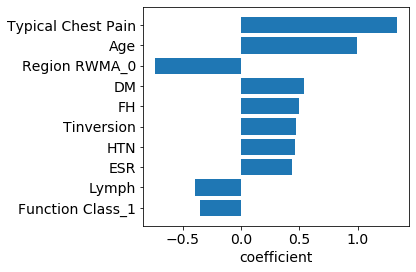

In [22]:
plt.rcParams.update({'font.size': 14})
plt.barh(np.arange(10),coefs[sorted_indcs[-10:]])
plt.yticks(np.arange(10),feature_names[sorted_indcs[-10:]])
plt.xlabel('coefficient')
# plt.title('not all scaled')
plt.tight_layout()
plt.savefig('log_ftr.png',dpi=300)
plt.show()

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, fbeta_score
from sklearn.metrics import confusion_matrix

def logit_pip_ftr(X,y,random_state,n_folds):

    X_other, X_test, y_other, y_test = train_test_split(X, y, test_size=0.3, random_state = random_state[0])
    kf = StratifiedKFold(n_splits=n_folds,shuffle=True,random_state=random_state[1])
    CV_scores = []
    test_scores = []
    pre = []
    rec = []
    f13 = []
    cf = []

    for train_index, CV_index in kf.split(X_other,y_other):
        X_train, X_CV = X_other.iloc[train_index], X_other.iloc[CV_index]
        y_train, y_CV = y_other.iloc[train_index], y_other.iloc[CV_index]

        scaler = StandardScaler()
        scaler2 = StandardScaler()
        oh = OneHotEncoder(sparse=False,handle_unknown = "ignore")
        od = OrdinalEncoder(categories = [['N','mild','Moderate','Severe']])
        X_train_cont = X_train[cont_ftr]
        X_train_cat = X_train[cat_ftr]
        X_train_od = X_train[ord_ftr]
        X_train_cont = scaler.fit_transform(X_train_cont)
        X_train_cat = scaler2.fit_transform(oh.fit_transform(X_train_cat))
        X_train_od = scaler2.fit_transform(od.fit_transform(X_train_od))
        X_train = np.concatenate((X_train_cont,X_train_cat,
                                  np.array(X_train[bi_ftr]),X_train_od),axis=1)

        X_c_cont = X_CV[cont_ftr]
        X_c_cat = X_CV[cat_ftr]
        X_c_od = X_CV[ord_ftr]
        X_c_cont = scaler.transform(X_c_cont)
        X_c_cat = scaler2.fit_transform(oh.transform(X_c_cat))
        X_c_od = scaler2.fit_transform(od.transform(X_c_od))
        X_c = np.concatenate((X_c_cont,X_c_cat,
                              np.array(X_CV[bi_ftr]),X_c_od),axis=1)

        X_t_cont = X_test[cont_ftr]
        X_t_cat = X_test[cat_ftr]
        X_t_od = X_test[ord_ftr]
        X_t_cont = scaler.transform(X_t_cont)
        X_t_cat = scaler2.fit_transform(oh.transform(X_t_cat))
        X_t_od = scaler2.fit_transform(od.transform(X_t_od))
        X_t = np.concatenate((X_t_cont,X_t_cat,
                              np.array(X_test[bi_ftr]),X_t_od),axis=1)

        cs = np.logspace(1,-3,num=50)
        train_score = []
        CV_score = []
        regs = []
        for c in cs:
            reg = LogisticRegression(penalty="l1",C=c,solver="saga",max_iter=10**4)
            reg.fit(X_train,y_train)
            train_score.append(accuracy_score(y_train,reg.predict(X_train)))
            CV_score.append(accuracy_score(y_CV,reg.predict(X_c)))
            regs.append(reg)
        best_c = cs[np.argmax(CV_score)]
        reg = regs[np.argmax(CV_score)]
        CV_scores.append(np.max(CV_score))
        test_scores.append(accuracy_score(y_test,reg.predict(X_t)))
        pre.append(precision_score(y_test,reg.predict(X_t)))
        rec.append(recall_score(y_test,reg.predict(X_t)))
        f13.append(fbeta_score(y_test,reg.predict(X_t),1.3))
    return (CV_scores,test_scores,pre,rec,f13,best_c)

In [28]:
logit_pip_ftr(X,y,[10,14],5)

([0.8604651162790697,
  0.8837209302325582,
  0.9285714285714286,
  0.8095238095238095,
  0.8571428571428571],
 [0.9010989010989011,
  0.9230769230769231,
  0.9340659340659341,
  0.9230769230769231,
  0.9230769230769231],
 [0.9130434782608695,
  0.9154929577464789,
  0.9285714285714286,
  0.927536231884058,
  0.9154929577464789],
 [0.9545454545454546,
  0.9848484848484849,
  0.9848484848484849,
  0.9696969696969697,
  0.9848484848484849],
 [0.9386839481555334,
  0.9578722471787009,
  0.9631486173845986,
  0.9535836933643514,
  0.9578722471787009],
 0.33932217718953295)

In [ ]:
scaler = StandardScaler()
scaler2 = StandardScaler()
oh = OneHotEncoder(sparse=False,handle_unknown = "ignore")
od = OrdinalEncoder(categories = [['N','mild','Moderate','Severe']])
X_train_cont = X[cont_ftr]
X_train_cat = X[cat_ftr]
X_train_od = X[ord_ftr]
X_train_cont = scaler.fit_transform(X_train_cont)
X_train_cat = scaler2.fit_transform(oh.fit_transform(X_train_cat))
X_train_od = scaler2.fit_transform(od.fit_transform(X_train_od))
X_train = np.concatenate((X_train_cont,X_train_cat,
                          np.array(X[bi_ftr]),X_train_od),axis=1)

reg = LogisticRegression(penalty="l1",C=0.33932217718953295,solver="saga",max_iter=10**4)
reg.fit(X_train,y)